In [30]:
import torch
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

torch.Size([1, 28, 28]) 5
mnist_train 길이 : 60000
5
torch.Size([1, 28, 28])


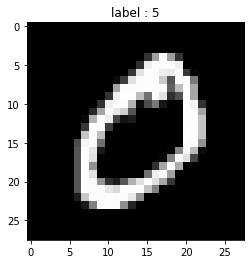

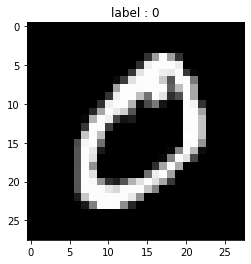

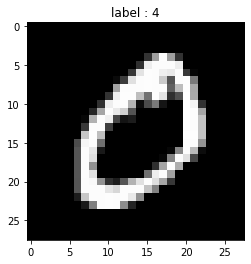

In [24]:
# 1. MNIST 로드
# train 용으로 쓰겠다.
mnist_train = dset.MNIST("", train=True, transform=transforms.ToTensor(),target_transform=None, download=False)

# 2. 그려보기
# MNIST data 하나 형태 출력
image, label = mnist_train.__getitem__(0)
print(image.size(),label)

image, label = mnist_train[1]
print("mnist_train 길이 :", len(mnist_train))

# 그리기
print(mnist_train[0][1]) #label
print(mnist_train[0][0].size()) #image

for i in range(3):
    img = mnist_train[1][0].numpy()
    #print "label :",mnist_train[i][1]
    plt.title("label : %d" %mnist_train[i][1])
    plt.imshow(img[0],cmap='gray')
    plt.show()

In [25]:
# "" : 현재 폴더에 MNIST 있음
mnist_train = dset.MNIST("", train=True, transform=transforms.ToTensor(),target_transform=None, download=False)
mnist_test = dset.MNIST("", train=False, transform=transforms.ToTensor(),target_transform=None, download=False)

mnist_train 길이 :  60000
mnist_test 길이 :  10000
image data 형태 : torch.Size([1, 28, 28])
label : 5


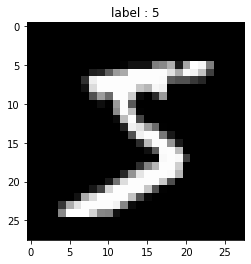

In [27]:
print("mnist_train 길이 : ", len(mnist_train))
print("mnist_test 길이 : ", len(mnist_test))

#데이터 하나 형태
image, label = mnist_train.__getitem__(0) # 0번째 데이터
print("image data 형태 :",image.size())
print("label :",label)

#그리기
img = image.numpy()
plt.title("label : %d" %label)
plt.imshow(img[0],cmap='gray')
plt.show()

In [28]:
batch_size = 16

In [31]:
train_loader = torch.utils.data.DataLoader(list(mnist_train)[:batch_size*100], batch_size = batch_size,
                                          # mnist_train을 학습시키자.
                                          shuffle=True, num_workers=2,
                                          drop_last=True) #batch_size 만큼 나눌 때 나머지는 버려라

test_loader = torch.utils.data.DataLoader((mnist_test),batch_size=batch_size,
                                         shuffle= False, num_workers=2,
                                         drop_last=True)

[0]
한 번에 로드되는 데이터 크기 16
torch.Size([16, 28, 28])
torch.Size([16])


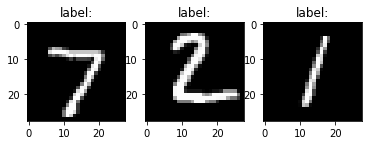

[1]
한 번에 로드되는 데이터 크기 16
torch.Size([16, 28, 28])
torch.Size([16])


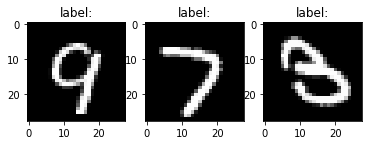

[2]
한 번에 로드되는 데이터 크기 16
torch.Size([16, 28, 28])
torch.Size([16])


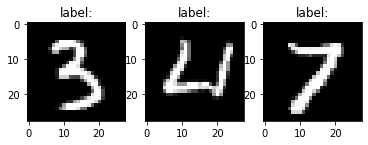

[3]
한 번에 로드되는 데이터 크기 16
torch.Size([16, 28, 28])
torch.Size([16])


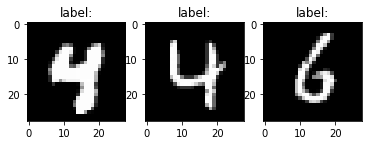

[4]
한 번에 로드되는 데이터 크기 16
torch.Size([16, 28, 28])
torch.Size([16])


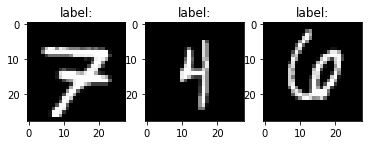

[5]
한 번에 로드되는 데이터 크기 16
torch.Size([16, 28, 28])
torch.Size([16])


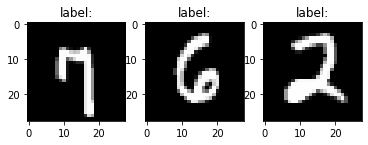

In [36]:
n=3 #샘플로 그려볼 데이터 개수
for i, [imgs,labels] in enumerate(test_loader): #batch_size만큼
    if i>5:
        break;
        
    print("[%d]" %i)
    print("한 번에 로드되는 데이터 크기",len(imgs))
    
    #GPU에 로드되기 위함, 만약 CPU로 설정되어 있다면 자동으로(?) CPU로 로드됨
    x = Variable(imgs) #.cuda() # (batch_size,1,28,28)
    x = x.reshape((x.shape[0],x.shape[2],x.shape[3])) #(batch_size,1,28,28) -> (batch_size,28,28)
    y = Variable(labels) #.cuda() #(batch_size)
    
    print(x.shape)
    print(y.shape)
    
    #그리기
    for j in range(n):
        img = imgs[j].numpy() #image 타입을 numpy로 변환(1,28,28)
        img = img.reshape((img.shape[1],img.shape[2])) #(1,28,28) -> (28,28)
        #print img.shape
        
        plt.subplot(1,n,j+1) # (1,3) 형태 플랏의 j번째 자리에 그리겠다.
        plt.imshow(img,cmap='gray')
        plt.title("label:" %labels[j])
    plt.show()    